![ICL](Images/imperiallogo.jpeg)

# Bayesian methods in ecology and evolution

https://bitbucket.org/mfumagal/statistical_inference

## day 2c: population inferences from finite samples 

We sequenced several genomes of bears and assigned each individual genotype.
What is the frequency of a certain allele at the population level?

![](Images/BrownBear.jpg)

We have only a sample of the entire population of bears but we want to make inferences at the whole population level.

Our sample contains information for 100 individuals with the following genotypes: 63 AA, 34 AG, 3 GG.
A frequentist estimate of the frequency of G is given by: $(34+(3\times2))/200=40/200=0.20$.

What is the posterior distribution for the population frequency of G?

The first thing we need to do is define our likelihood model.
We can imagine to randomly sample one allele from the population and each time the allele can be either G or not.

This is a set of Bernoulli trials and we can use of Binomial distribution as likelihood function.

The Binomial likelihood is
\begin{equation}
     P(k|p,n) = ( \genfrac{}{}{0pt}{}{n}{k} ) p^k(1-p)^{n-k}
\end{equation}
where $k$ is the number of successes (i.e. the event of sampling a G), $p$ is the proportion of $G$ alleles we have (i.e. the probability of a success), and $n$ is the number of alleles we sample.

Recall that
\begin{equation}
    (\genfrac{}{}{0pt}{}{n}{k}) = \frac{n!}{k!(n-k)!}
\end{equation}

Note that the combinatorial term does not contain $p$.

What is the maximum likelihood estimate of $p$?

You may recall that it is $\hat{p}=\frac{k}{n}$.
Note that the combinatorial terms does not affect this estimate.

The second thing we need to do is define a prior probability for $p$.

What is the interval of values that $p$ can take?

It is $[0,1]$, as we express frequencies relative to the whole population/sample.
It is convenient to choose a prior distribution which is conjugate to the Binomial.

A Beta distribution is a conjugate prior in this case.

Are certain values of $p$ more likely to occur without observing the data?

If that it is not the case, can we use the Beta distribution to generate a noninformative prior?

We can choose $Beta(\alpha=1,\beta=1)$, which is defined as
\begin{equation}
    P(p) = \frac{1}{B(\alpha,\beta)} p^{\alpha-1}(1-p)^{\beta-1}
\end{equation}
where $\frac{1}{B(\alpha,\beta)}$ is simply a normalisation term which does not depend on $p$.

The full model can be expressed as $P(p|k,n) \propto P(k|p,n)P(p)$.

The closed form for the posterior distribution given our choices for the likelihood and prior functions is

\begin{equation}
    P(p|k,n) \propto p^{k+\alpha-1}(1-p)^{n-k+\beta-1}
\end{equation}

The posterior distribution (Beta-Binomial model) is a Beta distribution with parameters $k+\alpha$ and $n-k+\beta$.

If we set $\alpha=\beta=1$ then $P(p|k,n)=Beta(k+1,n-k+1)$.
What are $k$ and $n$?

$n$ is the number of alleles we sample and $k$ is the occurence of allele $G$ in our sample.

__A)__ 

Plot the posterior probability. Then calculate the maximum a posteriori value, 95\% credible intervals, and notable quantiles. 

What happens to the distribution if we have only 10 samples (with the sample allele frequency of 0.20)?

[1] 0.1505353 0.1833743 0.2019887 0.2214999 0.2609733

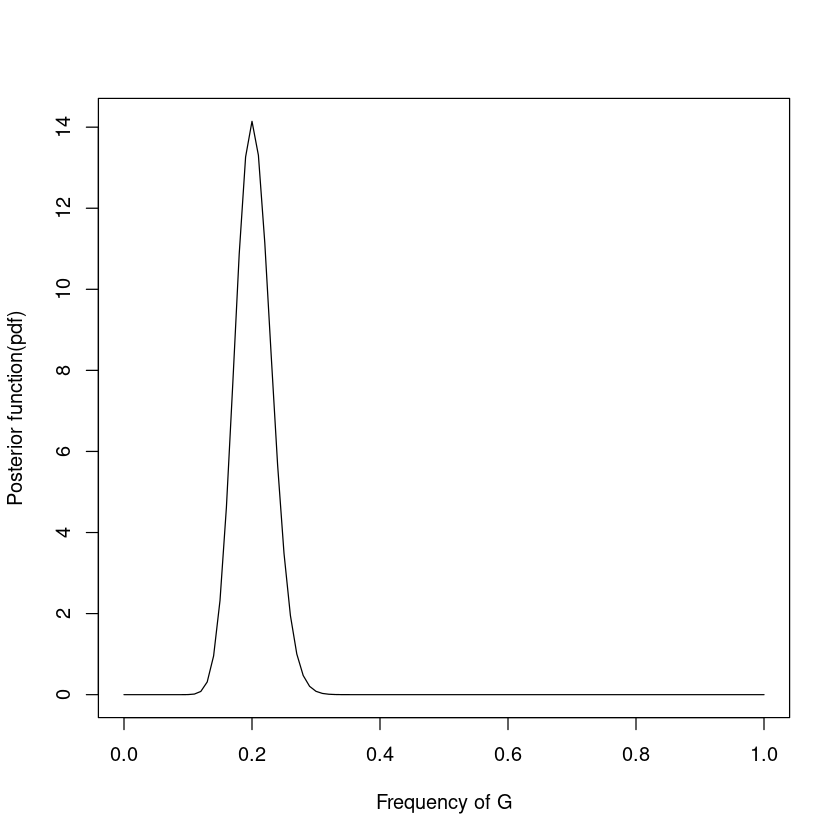

In [7]:
p <- seq(0,1,0.01)
k <- 40
n <- 200
alpha <- k+1
beta <- n-k+1

# caculate the beta likelihood (posterior probability)
beta_likelihood <- dbeta(p, shape1 = alpha, shape2 = beta)
# plot the beta function likelihood corresponding to p value
plot(p, beta_likelihood, type = 'l', xlab = 'Frequency of G', ylab = 'Posterior function(pdf)')
# calculate notable quantiles of beta function
qbeta(p = c(0.025, 0.25, 0.5, 0.75, 0.975), shape1 = alpha, shape2 = beta)





We can think of a more informative prior.
The genome-wide distribution of allele frequencies for human populations as a particular shape. This is called a site frequency spectrum (SFS) or allele frequency spectrum (AFS).
![](Images/AFS.png)

We can have another view at it by plotting the minor allele counts (MAC) distribution.
![](Images/MAC.png)

Does this distribution fit with a uniform prior?
Can we use a conjugate (Beta) function to model this distribution?

Also, we don't know _a priori_ whether the allele we are interested in is the minor allele.
Therefore a prior distribution with more density at both low and high frequencies might be more appropriate.

__B)__

Recalculate the posterior distribution of $p$ using an informative prior (make your own
choices regarding the parameter for the Beta distribution) both in the case of 100 and 10 samples.

Discuss how these results compare to the previous ones obtained in point A.

__C)__

Calculate the Bayes factor for a model with $p<=0.5$ vs a model with $p>0.5$. Note that these models are equally probable a priori.

In [ ]:
#...